## Analysing the Car Dataset

In [1]:
import pandas as pd

In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
file = pd.read_csv('car_price_prediction.csv')
df = file

In [4]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [5]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


# Data Preprocessing

In [6]:
df = df.rename(columns={'mileage(km/ltr/kg)': 'mileage',
                        'selling_price': 'price'
                       })

# Splitting the 'name' column into 'brand' and 'model' columns and removing the 'name' column
df['brand'] = df.name.str.split().str[0]
df['model'] = df.name.str.split().str[1:].apply(lambda x: ' '.join(x))
df = df.drop('name', axis=1)

# Changing the values in the owner column
df.owner = df.owner.replace({
    'First Owner': 'First',
    'Second Owner': 'Second',
    'Third Owner': 'Third',
    'Fourth & Above Owner': 'Fourth_or_above',
    'Test Drive Car': 'Test_drive' 
})

# Changing the column datatype from float to int
df.engine = df.engine.fillna(0).astype(int)
df.seats = df.seats.fillna(0).astype(int)

# Handle the max_power column: Remove non-numeric characters and convert to float
df['max_power'] = df['max_power'].str.replace(r'[^0-9.]', '', regex=True)
df['max_power'] = df['max_power'].replace('', '0').astype(float)

# Dropping null values 
df = df.dropna(subset=['mileage', 'max_power'])

df

,year,price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,model
0,2014,450000,145500,Diesel,Individual,Manual,First,23.40,1248,74.00,5,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second,21.14,1498,103.52,5,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third,17.70,1497,78.00,5,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First,23.00,1396,90.00,5,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First,16.10,1298,88.20,5,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First,18.50,1197,82.85,5,Hyundai,i20 Magna
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth_or_above,16.80,1493,110.00,5,Hyundai,Verna CRDi SX
8125,2009,382000,120000,Diesel,Individual,Manual,First,19.30,1248,73.90,5,Maruti,Swift Dzire ZDi
8126,2013,290000,25000,Diesel,Individual,Manual,First,23.57,1396,70.00,5,Tata,Indigo CR4


In [8]:
df = df.join(pd.get_dummies(df.transmission, prefix='transmission')).drop('transmission', axis=1)
df = df.join(pd.get_dummies(df.owner, prefix='owner')).drop('owner', axis=1)
df = df.join(pd.get_dummies(df.seller_type, prefix='seller_type')).drop('seller_type', axis=1)
df = df.join(pd.get_dummies(df.fuel, prefix='fuel')).drop('fuel', axis=1)
df = df.join(pd.get_dummies(df.brand, prefix='brand')).drop('brand', axis=1)
df = df.join(pd.get_dummies(df.model, prefix='model')).drop('model', axis=1)
df

,year,price,km_driven,mileage,engine,max_power,seats,transmission_Automatic,transmission_Manual,owner_First,...,model_i20 Magna 1.4 CRDi (Diesel),model_i20 Magna Optional 1.2,model_i20 Magna Optional 1.4 CRDi,model_i20 Petrol CVT Asta,model_i20 Sportz 1.2,model_i20 Sportz 1.4 CRDi,model_i20 Sportz AT 1.4,model_i20 Sportz Diesel,model_i20 Sportz Option 1.2,model_i20 Sportz Option 1.4 CRDi
0,2014,450000,145500,23.40,1248,74.00,5,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,21.14,1498,103.52,5,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2006,158000,140000,17.70,1497,78.00,5,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,127000,23.00,1396,90.00,5,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,2007,130000,120000,16.10,1298,88.20,5,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197,82.85,5,False,True,True,...,False,False,False,False,False,False,False,False,False,False
8124,2007,135000,119000,16.80,1493,110.00,5,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8125,2009,382000,120000,19.30,1248,73.90,5,False,True,True,...,False,False,False,False,False,False,False,False,False,False
8126,2013,290000,25000,23.57,1396,70.00,5,False,True,True,...,False,False,False,False,False,False,False,False,False,False


# Regression Model (Random Forest Regressor)

## Model Training

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X, y = df.drop('price', axis=1), df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'sqrt', 'log2', None]
}

reg = RandomForestRegressor(n_jobs=-1, random_state=10)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


## Model Evaluation

In [10]:
import math
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Best Estimator: {best_regressor}")
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Best Estimator: RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=257,
                      n_jobs=-1, random_state=10)
R2: 0.9408821629474479
MAE: 70004.29664756496
MSE: 41993744978.4419
RMSE: 204923.7540609724


In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Prediction VS Actual Price')

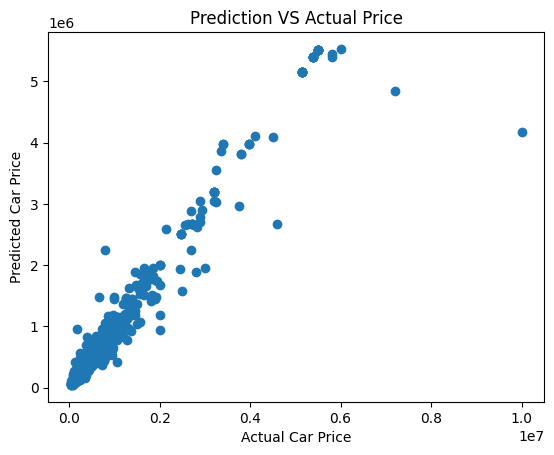

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Car Price')
plt.ylabel('Predicted Car Price')
plt.title('Prediction VS Actual Price')

## Feature Importance

In [13]:
importances = dict(zip(best_regressor.feature_names_in_, best_regressor.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances[:10]

[('max_power', 0.7229996386277867),
 ('year', 0.19837152004243738),
 ('km_driven', 0.01862458791126177),
 ('engine', 0.01126766027358556),
 ('mileage', 0.011226180290759053),
 ('model_XC40 D4 Inscription BSIV', 0.0046302932397085),
 ('seller_type_Individual', 0.0035923490201009117),
 ('seller_type_Dealer', 0.0035799684309346077),
 ('model_S-Class S 350 CDI', 0.002297341448027728),
 ('brand_Toyota', 0.002236364211924995)]

# Predicting the car price with user input

In [15]:
def predict_car_price(model, input_data):
    input_df = pd.DataFrame([input_data])

    input_df = input_df.join(pd.get_dummies(input_df.transmission, prefix='transmission')).drop('transmission', axis=1)
    input_df = input_df.join(pd.get_dummies(input_df.owner, prefix='owner')).drop('owner', axis=1)
    input_df = input_df.join(pd.get_dummies(input_df.seller_type, prefix='seller_type')).drop('seller_type', axis=1)
    input_df = input_df.join(pd.get_dummies(input_df.fuel, prefix='fuel')).drop('fuel', axis=1)
    input_df = input_df.join(pd.get_dummies(input_df.brand, prefix='brand')).drop('brand', axis=1)
    input_df = input_df.join(pd.get_dummies(input_df.model, prefix='model')).drop('model', axis=1)
    
    missing_cols = set(X_train.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0
    input_df = input_df[X_train.columns]
    
    predicted_price = model.predict(input_df)
    return predicted_price[0]

In [16]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

brand = input('Brand name of the car: ')
model = input('Model name of the car: ')
year = int(input('Year: '))
km_driven = int(input('Total amount of the car driven (km): '))
fuel = input('Type of fuel (Diesel/ Petrol): ')
seller_type = input('Seller type (Individual/ Dealer): ')
transmission = input('Transmission type (Manual/ Automatic): ')
owner = input('Owner (First/ Second/ Third/ Fourth_or_above/ Test_drive): ')
mileage = float(input('Total amount of mileage (e.g., 20.1/ 30.0): '))
engine = int(input('Number of the engine: '))
max_power = float(input('Value of the maximum power: '))
seats = int(input('Total amount of seats: '))

user_input = {
    'brand': brand,
    'model': model,
    'year': year,
    'km_driven': km_driven,
    'fuel': fuel,
    'seller_type': seller_type,
    'transmission': transmission,
    'owner': owner,
    'mileage': mileage,
    'engine': engine,
    'max_power': max_power,
    'seats': seats
}

# sample_input = {
#     'brand': 'Maruti',
#     'model': 'Swift Dzire VDI',
#     'year': 2015,
#     'km_driven': 50000,
#     'fuel': 'Diesel',
#     'seller_type': 'Individual',
#     'transmission': 'Manual',
#     'owner': 'First',
#     'mileage': 20.1,
#     'engine': 1248,
#     'max_power': 74.0,
#     'seats': 5
# }

predicted_price = predict_car_price(best_regressor, user_input)
print(f"Predicted Car Price: {predicted_price}")

Brand name of the car:  Maruti
Model name of the car:  Swift Dzire VD
Year:  2019
Total amount of the car driven (km):  50000
Type of fuel (Diesel/ Petrol):  Petrol
Seller type (Individual/ Dealer):  Individual
Transmission type (Manual/ Automatic):  Automatic
Owner (First/ Second/ Third/ Fourth_or_above/ Test_drive):  First
Total amount of mileage (e.g., 20.1/ 30.0):  30.5
Number of the engine:  1999
Value of the maximum power:  80
Total amount of seats:  5


Predicted Car Price: 784644.1345191774
